# Unit 5 - Financial Planning

## Imports + .env Variables

In [11]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [12]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [13]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3
monthly_income = 12000

In [14]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [15]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()

# Fetch current ETH price
eth_response = requests.get(eth_url).json()

In [16]:
import json
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19630137,
            "total_supply": 19630137,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 51940.0,
                    "volume_24h": 23718895833,
                    "market_cap": 1019531697971,
                    "percentage_change_1h": 0.0458978170250284,
                    "percentage_change_24h": -0.340884461173031,
                    "percentage_change_7d": 9.69157492234235,
                    "percent_change_1h": 0.0458978170250284,
                    "percent_change_24h": -0.340884461173031,
                    "percent_change_7d": 9.69157492234235
                }
            },
            "last_updated": 1708151780
        }
    },
    "metadata": {
        "timestamp": 1708151780,
        "num_

In [17]:
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120165122,
            "total_supply": 120165122,
            "max_supply": 120165122,
            "quotes": {
                "USD": {
                    "price": 2789.53,
                    "volume_24h": 17241448111,
                    "market_cap": 335115395970,
                    "percentage_change_1h": 0.179516157228694,
                    "percentage_change_24h": -2.12440887861743,
                    "percentage_change_7d": 11.3408785417025,
                    "percent_change_1h": 0.179516157228694,
                    "percent_change_24h": -2.12440887861743,
                    "percent_change_7d": 11.3408785417025
                }
            },
            "last_updated": 1708151777
        }
    },
    "metadata": {
        "timestamp": 1708151777,
       

In [18]:
# Compute current value of my crpto
btc_price = btc_response['data']['1']['quotes']['USD']['price']
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

In [19]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $62328.00
The current value of your 5.3 ETH is $14784.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [22]:
# Format current date as ISO format
today = pd.Timestamp("2024-01-31", tz="America/New_York").isoformat()

# Set the tickers
ticker = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_df = api.get_bars(
    ticker,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_df[ticker_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_df[ticker_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
concat_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
concat_df.index = concat_df.index.date
# Preview DataFrame
concat_df.head()

AGG                                                         SPY  \
           close   high    low trade_count  open    volume      vwap   close   
2024-01-31  99.1  99.26  98.81       42254  99.0  10829125  99.05177  482.88   

                                                                         
                high     low trade_count    open     volume        vwap  
2024-01-31  489.0813  482.86      780578  488.62  126011062  485.893814

In [23]:
# Pick AGG and SPY close prices
agg_close_price = concat_df['AGG']['close'][0]
spy_close_price = concat_df['SPY']['close'][0]
                                        
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.1
Current SPY closing price: $482.88


In [24]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
print(my_agg_value)
print(my_spy_value)

19820.0
24144.0


In [25]:
# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $19820.00
The current value of your 50 SPY shares is $24144.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
savings = {
    'amount': {
        'crypto': (my_btc_value + my_eth_value),
        'shares': (my_agg_value + my_spy_value)
    }
}
# Create savings DataFrame
saving_df = pd.DataFrame(savings)

# Display savings DataFrame
display(saving_df)

,amount
crypto,77112.509
shares,43964.000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

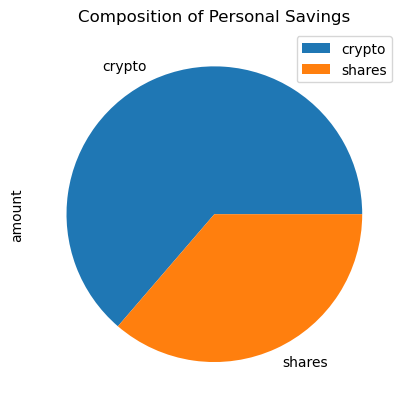

In [27]:
# Plot savings pie chart
saving_df.plot.pie(y='amount', title='Composition of Personal Savings')

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = saving_df['amount'].sum()

# Validate saving health
print(f'Congratulations! You have enough money in your emergency fund.' if total_savings > emergency_fund else f'You are ${emergency_fund - total_savings} away from reaching the goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [29]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-01-31', tz='America/New_York').isoformat()
end_date = today

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
data_5years_df = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = data_5years_df[data_5years_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = data_5years_df[data_5years_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
five_years_df = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
five_years_df.index = five_years_df.index.date

# Display sample data
five_years_df.head(10)

AGG                                                    \
             close      high       low trade_count    open    volume   
2019-01-31  107.46  107.5300  107.2900       40561  107.30  16852710   
2019-02-01  106.97  107.1500  106.8800       22730  107.09   8184344   
2019-02-04  106.88  106.9000  106.7700       26390  106.83  16382485   
2019-02-05  107.11  107.1400  106.9500       19354  106.95  11238036   
2019-02-06  107.05  107.2200  106.9850       18235  107.20   6530320   
2019-02-07  107.10  107.1983  107.0300       13590  107.15   4403984   
2019-02-08  107.34  107.3800  107.1700       11400  107.17   4934695   
2019-02-11  107.23  107.2800  107.1500       11414  107.23   3843906   
2019-02-12  107.25  107.2600  107.1217       12632  107.22   3574419   
2019-02-13  107.06  107.1400  107.0100        9458  107.08   2738473   

                           SPY                                                 \
                  vwap   close    high     low trade_count    open     volume   
2019-01-31  107.452225  269.81  270.47  267.27      407112  267.51  107152582   
2019-02-01  106.961719  270.08  271.20  269.18      362544  270.15   87113187   
2019-02-04  106.852941  272.01  272.03  269.36      262716  270.11   63614067   
2019-02-05  107.096982  273.16  273.44  271.88      313518  272.44   82298180   
2019-02-06  107.064488  272.83  273.34  271.92      257061  272.79   61485829   
2019-02-07  107.118774  270.17  271.55  268.29      487274  270.94   96611850   
2019-02-08  107.325619  270.54  270.58  267.83      372019  268.75   76471005   
2019-02-11  107.214412  270.69  271.49  270.03      288513  271.20   69530504   
2019-02-12  107.199711  274.06  274.52  272.34      308611  272.42   73533121   
2019-02-13  107.076374  274.95  275.93  274.56      294127  275.03   66896771   

                        
                  vwap  
2019-01-31  269.463122  
2019-02-01  270.130672  
2019-02-04  271.039554  
2019-02-05  272.817509  
2019-02-06  272.698658  
2019-02-07  269.837507  
2019-02-08  269.226208  
2019-02-11  270.651928  
2019-02-12  273.805429  
2019-02-13  275.189334

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = five_years_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                                             \
             close    high      low trade_count    open    volume        vwap   
2019-01-31  107.46  107.53  107.290       40561  107.30  16852710  107.452225   
2019-02-01  106.97  107.15  106.880       22730  107.09   8184344  106.961719   
2019-02-04  106.88  106.90  106.770       26390  106.83  16382485  106.852941   
2019-02-05  107.11  107.14  106.950       19354  106.95  11238036  107.096982   
2019-02-06  107.05  107.22  106.985       18235  107.20   6530320  107.064488   

                            SPY                                      \
           daily_return   close    high     low trade_count    open   
2019-01-31          NaN  269.81  270.47  267.27      407112  267.51   
2019-02-01    -0.004560  270.08  271.20  269.18      362544  270.15   
2019-02-04    -0.000841  272.01  272.03  269.36      262716  270.11   
2019-02-05     0.002152  273.16  273.44  271.88      313518  272.44   
2019-02-06    -0.000560  272.83  273.34  271.92      257061  272.79   

                                                
               volume        vwap daily_return  
2019-01-31  107152582  269.463122          NaN  
2019-02-01   87113187  270.130672     0.001001  
2019-02-04   63614067  271.039554     0.007146  
2019-02-05   82298180  272.817509     0.004228  
2019-02-06   61485829  272.698658    -0.001208

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 110.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 120.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 130.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 140.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 150.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 160.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 170.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 180.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 190.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 200.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 210.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 220.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 230.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 240.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 250.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 260.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 270.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 280.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 290.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 300.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 310.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 320.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 330.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 340.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 350.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 360.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 370.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 380.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 390.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 400.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 410.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 420.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 430.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 440.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 450.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 460.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 470.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 480.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 490.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992031,1.011324,0.999265,1.015895,1.001786,1.000026,1.001104,0.987188,0.990991,0.988627,...,1.006194,1.006534,1.001241,0.983437,0.994487,0.990536,1.001184,0.994901,1.005215,1.001426
2,0.990576,0.991189,1.005859,1.010463,1.015550,0.996033,0.980882,0.985691,0.996430,0.997147,...,1.013949,1.003148,1.009517,0.992736,0.992492,0.989409,1.008709,0.994919,0.996244,0.989205
3,1.009929,0.978588,1.021706,1.014279,1.013683,0.979469,0.974546,0.974005,0.987534,0.989334,...,0.998226,1.003330,1.011025,0.997361,1.000452,0.991700,1.022280,0.989749,0.989208,0.992973
4,1.008150,0.972699,1.026350,1.019607,1.019365,0.982567,0.967637,0.979688,0.990565,0.982519,...,0.987792,1.009396,1.013312,0.993945,0.980835,0.998456,1.036298,1.000763,0.983340,0.998831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.622391,5.417834,3.060766,6.951689,29.951313,6.215182,12.433590,4.919353,7.182321,4.654942,...,14.393635,4.518201,11.681496,2.097210,6.158418,4.332183,22.240334,8.986543,7.230229,7.681464
7557,8.648204,5.354870,3.036136,6.878268,29.846040,6.259243,12.481352,4.901223,7.276588,4.694799,...,14.428195,4.468085,11.724753,2.102631,6.126442,4.363572,22.056282,9.035837,7.304812,7.703180
7558,8.687673,5.302966,2.998545,6.846998,29.934454,6.244332,12.496589,4.870813,7.276244,4.690311,...,14.306778,4.412322,11.692543,2.091710,6.093406,4.435414,22.151369,9.021632,7.279546,7.732232
7559,8.606182,5.305021,2.988422,6.747885,29.769635,6.174327,12.563158,4.857191,7.292021,4.651578,...,14.644452,4.403968,11.577343,2.076177,6.074551,4.469100,22.168686,9.049056,7.254215,7.747221


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

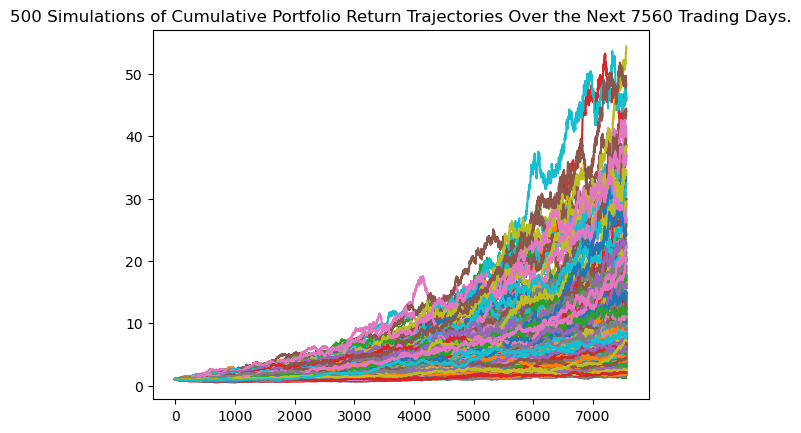

In [34]:
# Plot simulation outcomes
MC_30year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

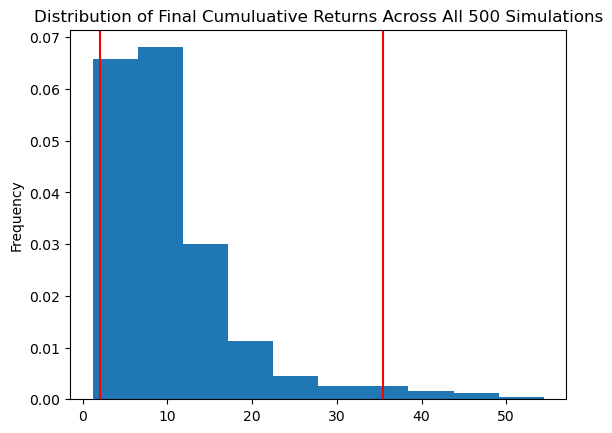

In [35]:
# Plot probability distribution and confidence intervals
MC_30year.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30year_summary = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(MC_30year_summary)

count           500.000000
mean             10.444749
std               7.851295
min               1.216102
25%               5.344226
50%               8.354704
75%              12.697072
max              54.417576
95% CI Lower      2.066572
95% CI Upper     35.437655
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30_year = round(MC_30year_summary[8]*initial_investment,2)
ci_upper_30_year = round(MC_30year_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_year} and ${ci_upper_30_year}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41331.45 and $708753.09


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
initial_increased_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30year_summary[8]*initial_increased_investment,2)
ci_upper = round(MC_30year_summary[9]*initial_increased_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $61997.17 and $1063129.64


## Optional Challenge - Early Retirement

### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = five_years_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000147,1.009292,1.002059,0.989180,1.009849,0.992837,1.011934,0.976483,1.006285,0.982613,...,1.004824,1.009976,0.988209,0.998279,1.022369,1.008131,0.993188,0.988919,1.009572,1.007390
2,1.012427,1.001873,0.993087,0.979906,1.014090,0.990191,1.017570,0.979639,1.014454,0.996198,...,1.006926,1.024908,0.996327,0.989894,1.023281,1.021266,0.994118,0.991595,0.998671,1.002582
3,1.015557,1.003786,0.996322,0.985731,1.005517,1.001516,1.021244,0.960614,1.029097,0.979839,...,1.015079,1.022987,0.995336,0.991642,1.039972,1.019193,1.006622,0.986981,1.014899,1.001149
4,1.039802,1.013205,1.005830,0.980337,0.999869,1.017635,1.042128,0.969373,1.038030,0.985664,...,1.017613,1.023939,1.003575,1.003585,1.027011,1.024726,1.017868,0.961828,1.002836,1.009423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.972947,1.333557,2.331744,1.029208,1.346608,2.508146,1.099768,1.463496,1.271953,1.257980,...,1.818211,1.702643,1.264649,1.431855,2.941039,1.666723,0.784599,1.017684,2.438303,2.277498
1257,1.975642,1.302469,2.336743,1.022630,1.338723,2.493649,1.093222,1.486385,1.300021,1.266374,...,1.806218,1.682241,1.297819,1.433768,2.947743,1.672038,0.803085,1.025655,2.372068,2.257450
1258,1.961540,1.295087,2.345222,1.024229,1.353669,2.498898,1.094697,1.496742,1.303417,1.275057,...,1.810643,1.698129,1.302354,1.450919,2.960823,1.682695,0.802537,1.034192,2.406731,2.222554
1259,1.936398,1.293100,2.318659,1.026133,1.350625,2.461850,1.093081,1.508332,1.308418,1.280523,...,1.803906,1.689145,1.300644,1.439217,2.946784,1.678329,0.791017,1.036211,2.332262,2.229256


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

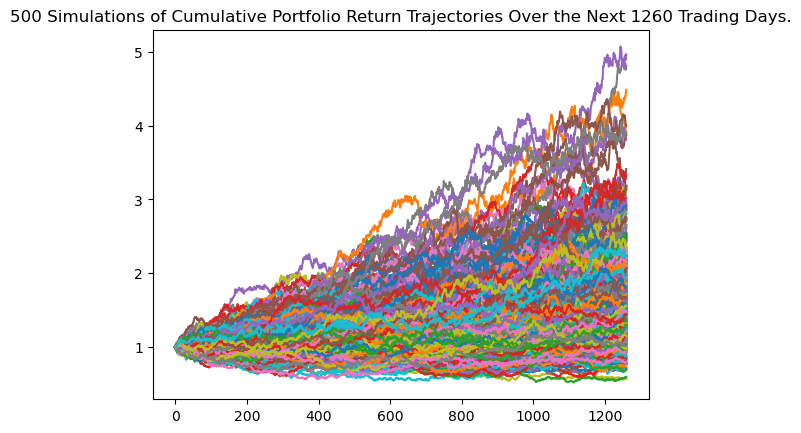

In [41]:
# Plot simulation outcomes
MC_5year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

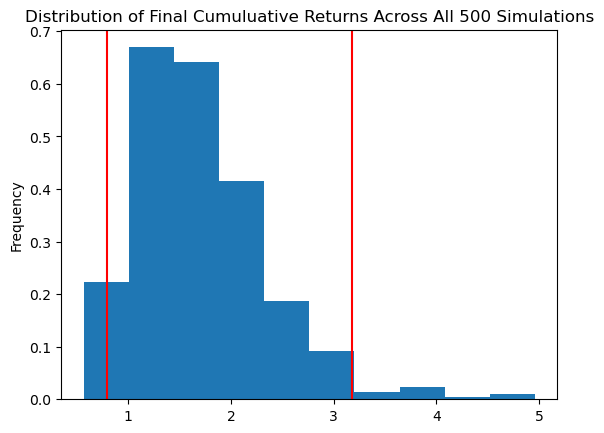

In [42]:
# Plot probability distribution and confidence intervals
MC_5year.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5year_summary = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(MC_5year_summary)

count           500.000000
mean              1.706571
std               0.643927
min               0.567642
25%               1.255256
50%               1.591573
75%               2.053162
max               4.958857
95% CI Lower      0.787926
95% CI Upper      3.176200
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five_year = round(MC_5year_summary[8]*initial_investment,2)
ci_upper_five_year = round(MC_5year_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five_year} and ${ci_upper_five_year}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $15758.52 and $63524.01


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = five_years_df,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 120.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 190.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 200.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 250.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 340.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 350.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 440.
Running Monte Carlo simulation number 450.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challenge_files/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/TFitz/Documents/School/FINTECH-Homework-Modules/Module 5 challenge/challe

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989511,0.988407,1.003970,0.997562,1.006473,1.004935,0.996040,1.019529,1.014963,1.013443,...,1.017591,0.998734,1.008516,1.009065,0.989819,0.986429,1.020582,1.011480,1.002972,0.986751
2,0.985272,0.994552,1.002376,0.980596,1.015338,0.992440,1.010993,1.018901,1.007528,1.004244,...,1.002505,0.993422,1.022293,1.010128,1.006355,0.995289,1.018761,0.997862,1.007322,0.982187
3,0.975928,0.991574,0.995507,0.974763,1.020297,0.998464,0.994164,1.034853,1.019136,1.009932,...,0.999727,1.012773,1.011941,1.013242,0.998251,0.993405,1.038053,0.998874,1.016157,0.981211
4,0.964326,0.987722,1.002203,0.971154,0.998393,0.998011,0.994615,1.031245,1.021635,1.001384,...,1.001398,1.003073,1.008935,0.995383,1.008793,0.985688,1.030937,0.989154,1.021916,0.984492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.159619,1.391832,2.075583,2.719123,2.221813,6.569878,2.482766,2.154341,0.819193,2.118175,...,2.476791,1.550791,3.217302,2.460234,2.108004,1.527303,4.771191,2.491182,1.873950,1.568602
2517,3.128654,1.390269,2.041088,2.693472,2.237301,6.521131,2.483206,2.162231,0.809039,2.089148,...,2.492856,1.529523,3.219899,2.459243,2.118359,1.506186,4.848268,2.496501,1.862100,1.544938
2518,3.120787,1.378641,2.015679,2.673804,2.224555,6.607128,2.495742,2.134251,0.799875,2.100814,...,2.509325,1.533203,3.226735,2.437081,2.129017,1.510020,4.774742,2.485893,1.852457,1.548572
2519,3.076149,1.389086,2.009274,2.649772,2.232109,6.585523,2.474364,2.174975,0.797432,2.070482,...,2.529099,1.535418,3.269949,2.439373,2.121385,1.525925,4.790104,2.481405,1.835416,1.539371


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

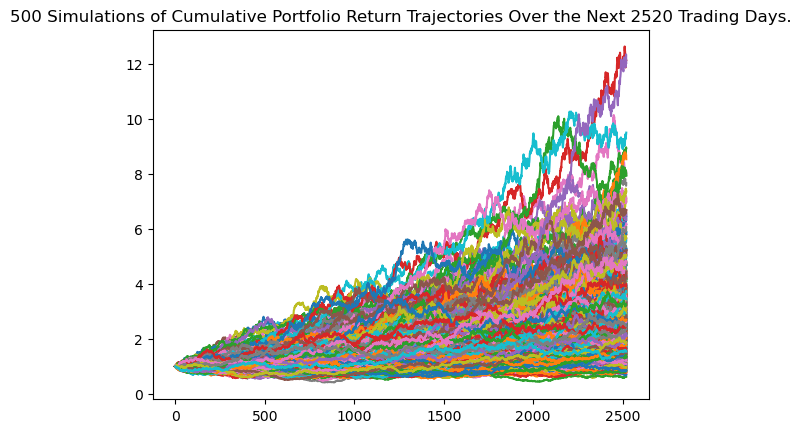

In [47]:
# Plot simulation outcomes
MC_10year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

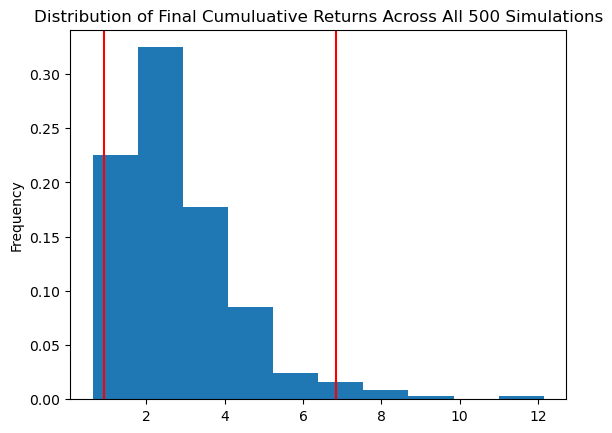

In [48]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10year_summary = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(MC_10year_summary)

count           500.000000
mean              2.826673
std               1.561216
min               0.631351
25%               1.741719
50%               2.466785
75%               3.523384
max              12.149173
95% CI Lower      0.908978
95% CI Upper      6.845118
Name: 2520, dtype: float64


In [50]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_years = round(MC_10year_summary[8]*initial_investment,2)
ci_upper_ten_years = round(MC_10year_summary[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_years} and ${ci_upper_ten_years}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18179.57 and $136902.36


# RESULTS

In [51]:
# for 30 year analysis 
print(f'30 year portfolio weighted 60/40 stocks/bonds')
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_year} and ${ci_upper_30_year}")
print("*"*80)
print()
# for 10 year analysis
print(f'10 year portfolio weighted 80/20 stocks/bonds')
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_years} and ${ci_upper_ten_years}")
print("*"*80)
print()
# for 5 year analysis
print(f'5 year portfolio weighted 80/20 stocks/bonds')
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio" 
      f"over the next 5 years will end within in the range of"
       f" ${ci_lower_five_year} and ${ci_upper_five_year}")
print("*"*80)

30 year portfolio weighted 60/40 stocks/bonds
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $41331.45 and $708753.09
********************************************************************************

10 year portfolio weighted 80/20 stocks/bonds
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $18179.57 and $136902.36
********************************************************************************

5 year portfolio weighted 80/20 stocks/bonds
There is a 95% chance that an initial investment of $20000 in the portfolioover the next 5 years will end within in the range of $15758.52 and $63524.01
********************************************************************************
